### This notebook computes the joint likelihood in 5 dimensions for the parameters of interest (see below). See inference_demo for more details about basic usage

To run this notebook, download the pre-computed likelihoods for each lens from dropbox, put the .zip file into lenslikelihood/precomputed_likelihoods/ and unpack it: https://www.dropbox.com/s/gbj4d58kg6cax4e/logprior_likelihoods.zip?dl=0 

In [11]:
from lenslikelihood.measurements import flux_measurements, flux_measurement_uncertainties, all_lens_names, all_param_ranges_version2
import numpy as np

# Note that the syntax for the uncertainties is
# {'lens_name': (1-sigma-uncertainty, reference_index, uncertainty_in_ratio)}
# where reference_index is the reference image with which to compute the flux ratio, and uncertainty_in_ratio specifies
# whether the measurement uncertainty refers to the flux or the flux ratio
param_names = ['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index', 'sigma_sub']
param_ranges = [all_param_ranges_version2[name] for name in param_names]
for name in all_lens_names:
    print(name)
    print('fluxes/flux ratios measured: ', flux_measurements[name])
    print('uncertainties: ', flux_measurement_uncertainties[name])
    print('\n')

WGDJ0405
fluxes/flux ratios measured:  [0.8  0.52 1.   0.94]
uncertainties:  ([0.04, 0.061538461538461535, 0.024, 0.03418803418803419], 0, False)


HE0435
fluxes/flux ratios measured:  [0.96  0.976 1.    0.65 ]
uncertainties:  ([0.05, 0.049, 0.048, 0.056], 0, False)


WGD2038
fluxes/flux ratios measured:  [0.86 1.   0.79 0.4 ]
uncertainties:  ([0.01, 0.01724137931034483, 0.021739130434782608, 0.021739130434782608], 0, False)


B1422
fluxes/flux ratios measured:  [0.88  1.    0.474 0.025]
uncertainties:  ([0.011363636363636364, 0.01, 0.012765957446808512, None], 0, False)


WFI2033
fluxes/flux ratios measured:  [1.   0.65 0.5  0.53]
uncertainties:  ([0.03, 0.046875, 0.04, 0.03773584905660377], 0, False)


PSJ1606
fluxes/flux ratios measured:  [1.   1.   0.59 0.79]
uncertainties:  ([0.03, 0.03, 0.03333333333333333, 0.02564102564102564], 0, False)


WFI2026
fluxes/flux ratios measured:  [1.   0.75 0.31 0.28]
uncertainties:  ([0.02, 0.02666666666666667, 0.06451612903225806, 0.0357142857142

### Models implemented for the halo mass function and concentration-mass relation

The full set of hyper-parameters we're interested in constraining are defined by the parameterizations of the halo mass function and concentration-mass relation. They are $\Sigma_{\rm{sub}}$, $\delta_{\rm{LOS}}$, $\Delta \alpha$, $q$, $c_8$, and $\beta$. The first four define to the subhalo and field halo mass functions, and the last two define the concentration-mass relation. 

The field halo mass function is parameterized as
\begin{equation}
\frac{dN_{\rm{LOS}}}{dm dV} = \delta_{\rm{LOS}} \left(1+\xi_{\rm{2halo}}\right) \left(\frac{m}{10^8}\right)^{\Delta \alpha} \ \frac{dN_{\rm{ShethTormen}}}{dm dV}
\end{equation}
where $\delta_{\rm{LOS}}$ scales the overall normalization, and $\Delta \alpha$ parameterizes deviations from the logarithmic slope predicted by CDM around $10^8 M_{\odot}$. 

The subhalo mass function is parameterized as
\begin{equation}
\frac{dN_{\rm{sub}}}{dm dA} \sim \Sigma_{\rm{sub}} \ \left(\frac{m}{10^8}\right)^{\alpha + q \Delta \alpha}
\end{equation}
where $\Sigma_{\rm{sub}}$ is the normalization, $\alpha$ is the logarithmic slope predicted by CDM, $\Delta \alpha$ parameterizes deviations from the value predicted by CDM, and $q$ controls the coupling between the line of sight halo mass function slope and the subhalo mass function slope. When $q=1$ the slopes change in the same way, and when $q=0$ the slopes of the subhalo and field halo mass functions are completely decoupled. 

The concentration-mass relation is parameterized as 

\begin{equation}
c\left(M, z\right) = c_8 \left(1+z\right)^{\zeta} \left(\frac{\nu\left(M, z\right)}{\nu\left(10^8, z\right)}\right)^{-\beta}
\end{equation}
i.e. it is a power-law in the peak height $\nu$ with normalization $c_8$ at $10^8$ and a logarithmic slope $\beta$. The parameter $\zeta$ modifies the redshift evolution and is marginalized over in the sampling. 

The parameter names used in the python code have the following correspondence: 


1) sigma_sub = $\Sigma_{\rm{sub}}$

2) delta_power_law_index = $\Delta \alpha$

3) c0 = $c_8$

4) beta = $\beta$

5) delta_power_law_index_coupling = $q$

6) LOS_normalization = $\delta_{\rm{LOS}}$

### Example inference on three parameters with a subset of lenses

First load the model samples, define what parameters we want to look at

In [2]:
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods
import os
import pickle

nbins = 20
likelihoods = []

filename_extension = '_joint_logprior'
base_path = './../lenslikelihood/precomputed_likelihoods/'
print(all_lens_names)

lens_list = ['B1422',
            'HE0435',
            'WGD2038',
            'WGDJ0405',
            'WFI2033',
            'PSJ1606',
            'WFI2026',
            'RXJ0911',
            'RXJ1131',
            'MG0414',
            'PG1115']

for lens in lens_list:
    
    fname = base_path + lens + filename_extension
    print('loading joint likelihoods for lens '+lens+' ...')
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods.append(single_lens_likelihood)
    
likelihood = IndepdendentLikelihoods(likelihoods)

['WGDJ0405', 'HE0435', 'WGD2038', 'B1422', 'WFI2033', 'PSJ1606', 'WFI2026', 'RXJ0911', 'RXJ1131', 'MG0414', 'PG1115']
loading joint likelihoods for lens B1422 ...
loading joint likelihoods for lens HE0435 ...
loading joint likelihoods for lens WGD2038 ...
loading joint likelihoods for lens WGDJ0405 ...
loading joint likelihoods for lens WFI2033 ...
loading joint likelihoods for lens PSJ1606 ...
loading joint likelihoods for lens WFI2026 ...
loading joint likelihoods for lens RXJ0911 ...
loading joint likelihoods for lens RXJ1131 ...
loading joint likelihoods for lens MG0414 ...
loading joint likelihoods for lens PG1115 ...


[Text(0,0,'0.0'),
 Text(0,0,'0.025'),
 Text(0,0,'0.05'),
 Text(0,0,'0.075'),
 Text(0,0,'0.1')]

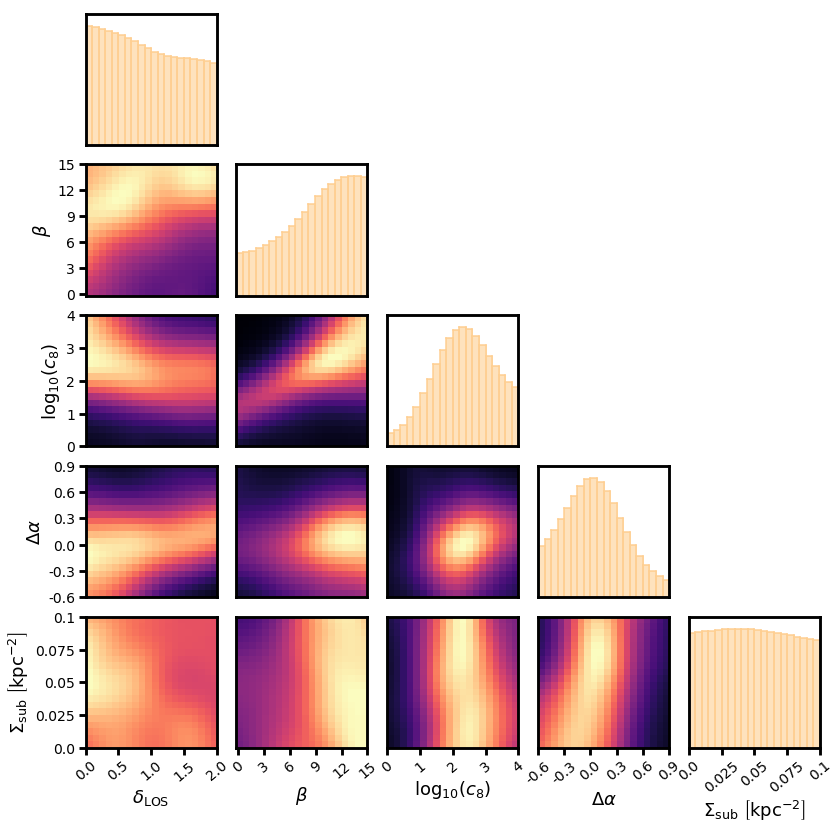

In [8]:
from trikde.triangleplot import TrianglePlot
triangle_plot = TrianglePlot([likelihood])
triangle_plot.set_cmap('magma')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )
beta = r'$\beta$'
beta_ticks = [0, 3, 6, 9, 12, 15]
c0 = r'$\log_{10}\left(c_8\right)$'
c0_ticks = [0, 1, 2 ,3, 4]
delta_power_law_index = r'$\Delta \alpha$'
dpli_ticks = [-0.6, -0.3, 0., 0.3, 0.6, 0.9]
sigma_sub = r'$\Sigma_{\rm{sub}} \ \left[\rm{kpc^{-2}}\right]$'
sigma_sub_ticks = [0., 0.025, 0.05, 0.075, 0.1]
delta_LOS = r'$\delta_{\rm{LOS}}$'
dlos_ticks = [0., 0.5, 1., 1.5, 2.]
ticksize = 14
labelsize = 18
rotation = 40

axes[5].set_ylabel(beta, fontsize=labelsize)
axes[5].set_yticks(beta_ticks)
axes[5].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[10].set_ylabel(c0, fontsize=labelsize)
axes[10].set_yticks(c0_ticks)
axes[10].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[15].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_yticks(dpli_ticks)
axes[15].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[20].set_ylabel(sigma_sub, fontsize=labelsize)
axes[20].set_yticks(sigma_sub_ticks)
axes[20].set_yticklabels(sigma_sub_ticks, fontsize=ticksize)

axes[20].set_xlabel(delta_LOS, fontsize=labelsize)
axes[20].set_xticks(dlos_ticks)
axes[20].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[21].set_xlabel(beta, fontsize=labelsize)
axes[21].set_xticks(beta_ticks)
axes[21].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[22].set_xlabel(c0, fontsize=labelsize)
axes[22].set_xticks(c0_ticks)
axes[22].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)


axes[23].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[23].set_xticks(dpli_ticks)
axes[23].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

axes[24].set_xlabel(sigma_sub, fontsize=labelsize)
axes[24].set_xticks(sigma_sub_ticks)
axes[24].set_xticklabels(sigma_sub_ticks, fontsize=ticksize, rotation=rotation)
# can change axis labels

In [12]:
from trikde.pdfs import CustomPriorHyperCube

def couple_mass_functions(samples, sigma_sub_theory=0.05, coupling_strength=0.05):
    
    delta_los_samples = samples[:, 0]
    sigma_sub_samples = samples[:, -1]
    delta_sigma_sub = sigma_sub_samples/sigma_sub_theory
    chi2 = (delta_sigma_sub - delta_los_samples)**2/coupling_strength**2 
    return chi2

kwargs_1 = {'sigma_sub_theory': 0.05}
kwargs_2 = {'sigma_sub_theory': 0.025}
prior_on_mass_functions_1 = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, nbins, kwargs_1)
prior_on_mass_functions_2 = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, nbins, kwargs_2)

likelihoods_coupled_with_prior_mass_functions = likelihoods + [prior_on_mass_functions_1]
likelihood_coupled_with_prior_mass_functions_1 = IndepdendentLikelihoods(likelihoods_coupled_with_prior_mass_functions)
likelihoods_coupled_with_prior_mass_functions = likelihoods + [prior_on_mass_functions_2]
likelihood_coupled_with_prior_mass_functions_2 = IndepdendentLikelihoods(likelihoods_coupled_with_prior_mass_functions)

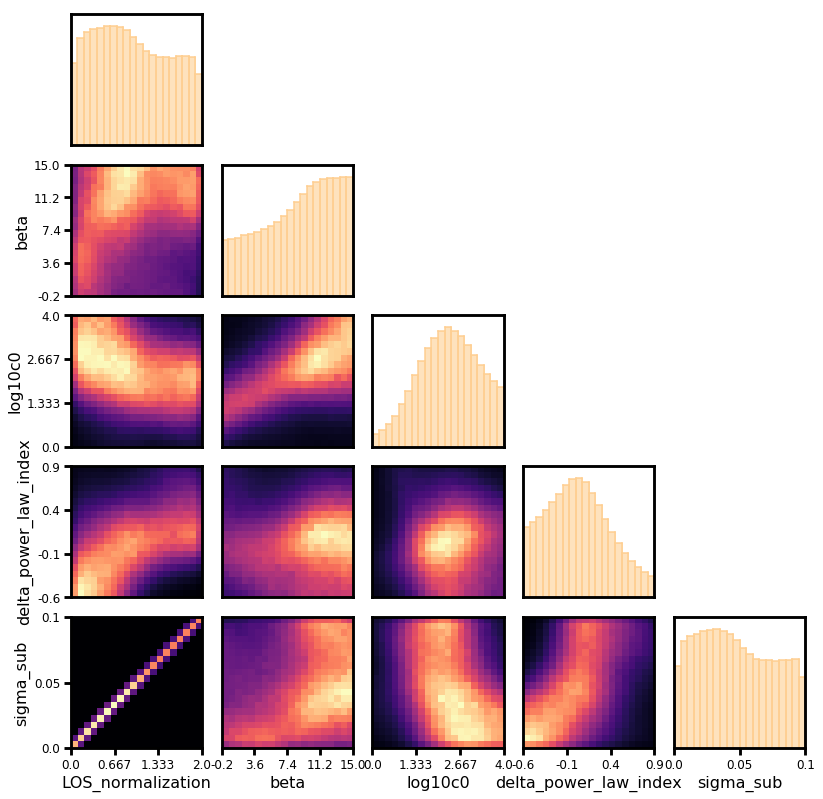

In [13]:
triangle_plot = TrianglePlot([likelihood_coupled_with_prior_mass_functions_1])
triangle_plot.set_cmap('magma')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )